In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
from sklearn import metrics
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [3]:
df=pd.read_csv('F:\Oasis intern\car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.shape

(301, 9)

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
df.drop('Car_Name',axis=1,inplace=True)

In [12]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type',
       'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [13]:
maximum=df['Year'].max()
Age=df['Year'].apply(lambda x:(maximum+1)-x)
df.drop('Year',axis=1,inplace=True)
df.insert(0,'Age',Age);df

,Age,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,11.50,12.50,9000,Diesel,Dealer,Manual,0


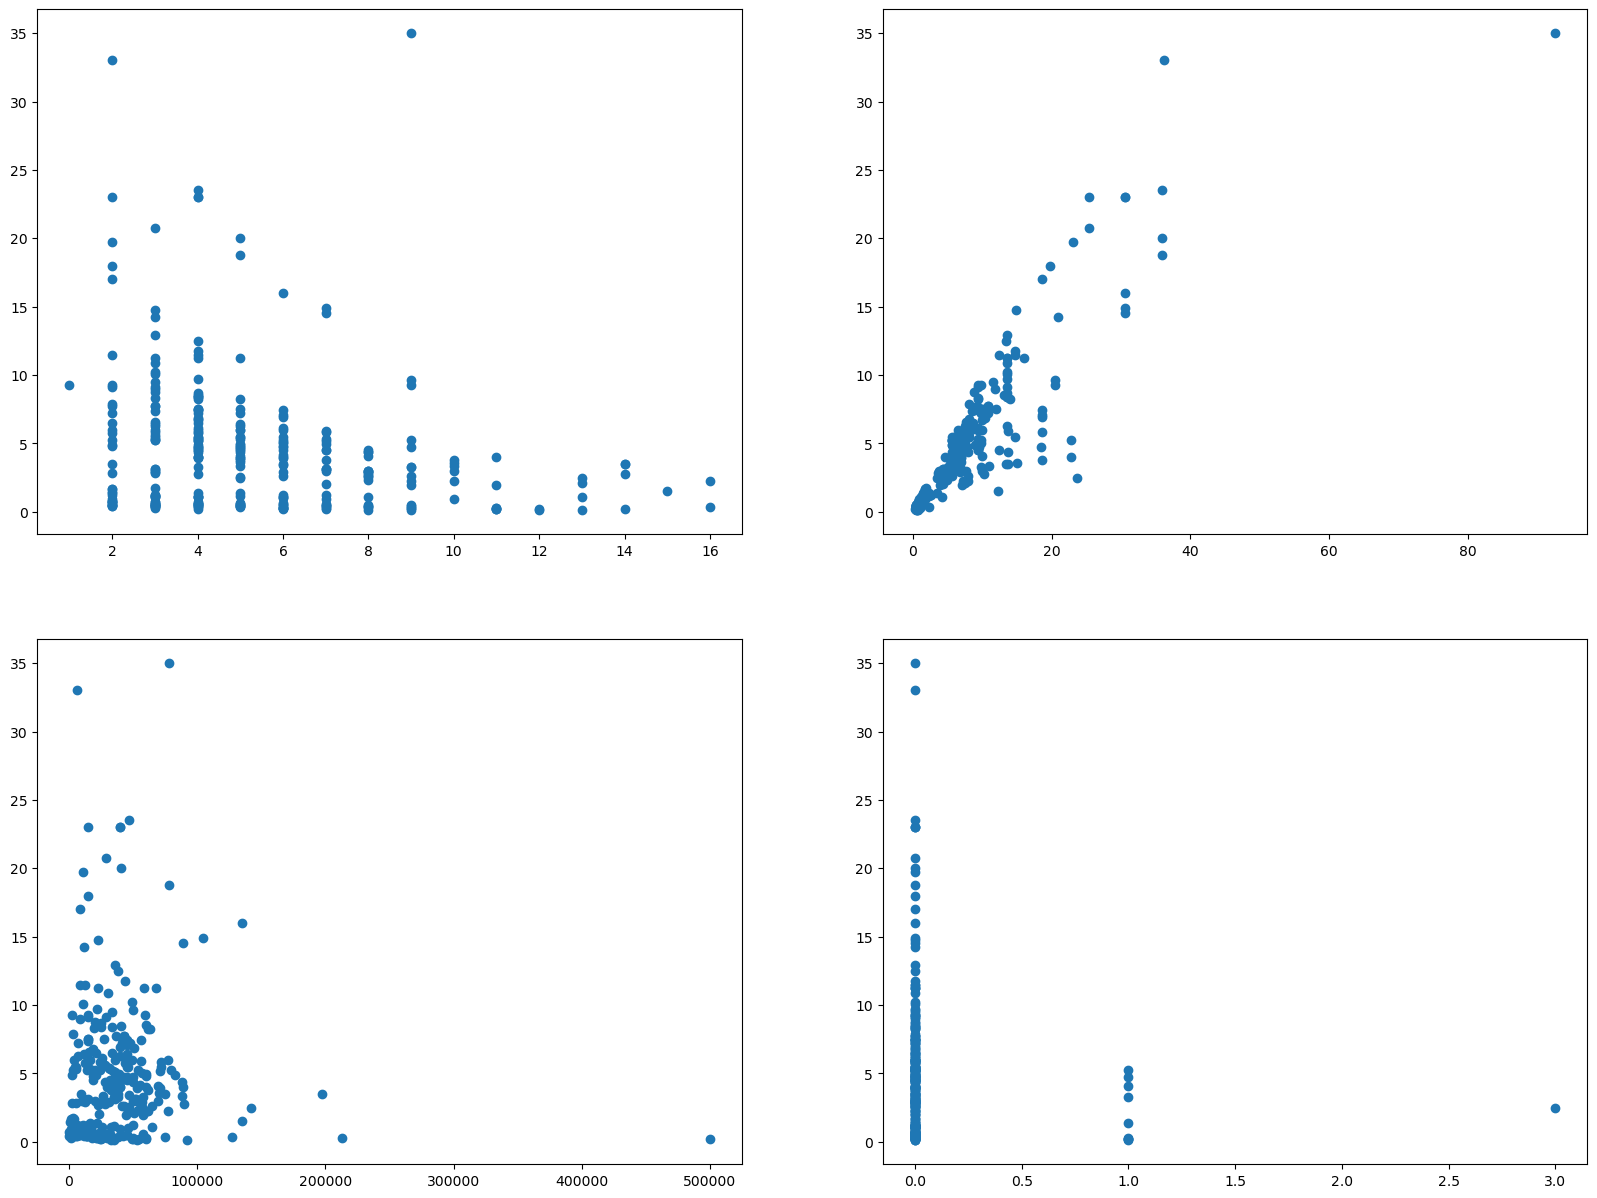

In [15]:
fig=plt.figure(figsize=(20,15))
fs=mpl.gridspec.GridSpec(2,2)
ax0=fig.add_subplot(fs[0:1,0:1])
ax0.scatter(df['Age'],df['Selling_Price'])

ax1=fig.add_subplot(fs[0:1,1:])
ax1.scatter(df['Present_Price'],df['Selling_Price'])

ax2=fig.add_subplot(fs[1:2,0:1])
ax2.scatter(df['Driven_kms'],df['Selling_Price'])

ax3=fig.add_subplot(fs[1:2,1:])
ax3.scatter(df['Owner'],df['Selling_Price'])

In [16]:
df[(df['Present_Price']>80)]

,Age,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
86,9,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [18]:
df[(df['Driven_kms']>450000)]

,Age,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
196,11,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [19]:
df.drop(index=[86,196],inplace=True)

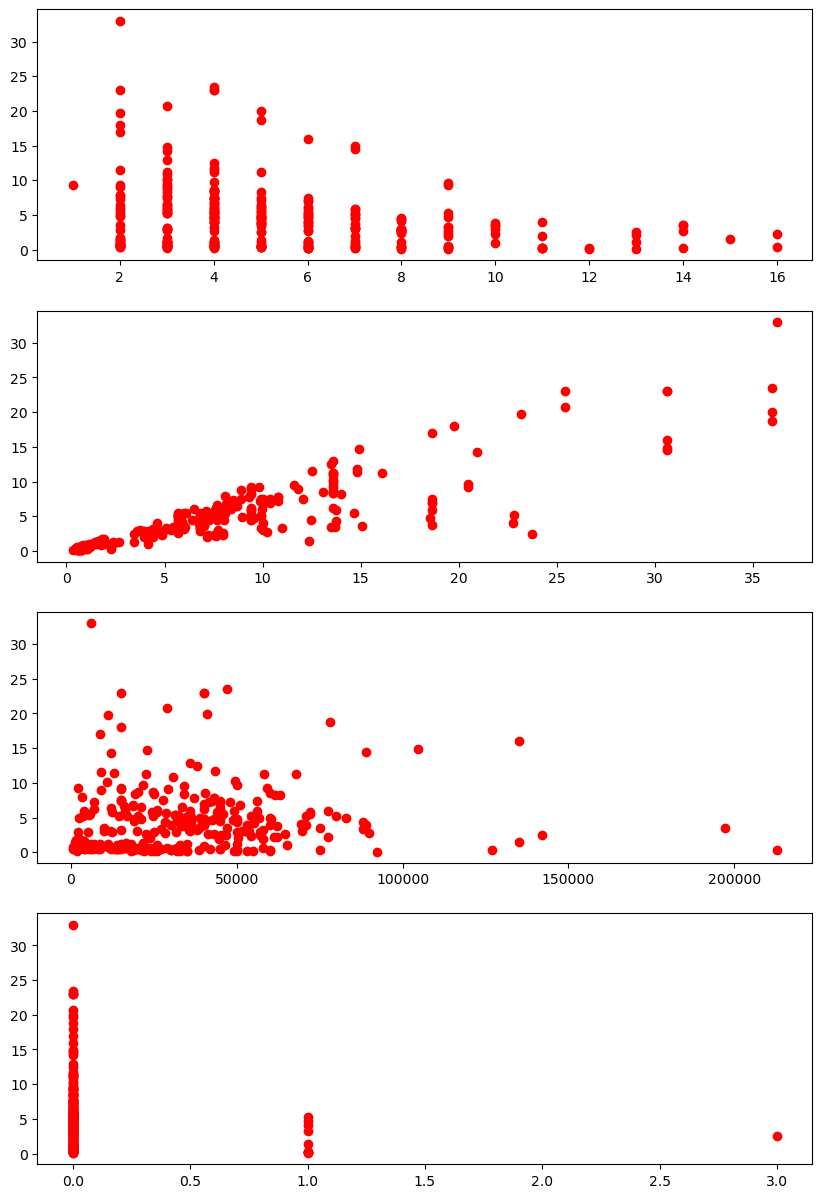

In [21]:
df_show=['Age','Present_Price','Driven_kms','Owner']
fig , ax=plt.subplots(4,1,figsize=(10,15))
for index,item in enumerate(df_show):
    ax[index].scatter(df[item],df['Selling_Price'],color='r')

In [22]:
df.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [25]:
df1=pd.get_dummies(df,columns=['Fuel_Type','Selling_type','Transmission'],drop_first=True)
df1

,Age,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,0,1,0,0,1
297,4,4.00,5.90,60000,0,0,1,0,1
298,10,3.35,11.00,87934,0,0,1,0,1
299,2,11.50,12.50,9000,0,1,0,0,1


In [26]:
df1.corr()

,Age,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
Age,1.000000,-0.275162,0.013624,0.617777,0.185671,-0.070641,0.065955,0.034617,0.014893
Selling_Price,-0.275162,1.000000,0.883844,0.062810,-0.091101,0.549127,-0.537184,-0.570043,-0.412520
Present_Price,0.013624,0.883844,1.000000,0.337714,0.016225,0.498219,-0.489813,-0.592041,-0.453547
Driven_kms,0.617777,0.062810,0.337714,1.000000,0.134016,0.257992,-0.259208,-0.212191,-0.087296
Owner,0.185671,-0.091101,0.016225,0.134016,1.000000,-0.052974,0.055223,0.125139,-0.052166
Fuel_Type_Diesel,-0.070641,0.549127,0.498219,0.257992,-0.052974,1.000000,-0.979364,-0.347161,-0.107406
Fuel_Type_Petrol,0.065955,-0.537184,-0.489813,-0.259208,0.055223,-0.979364,1.000000,0.355065,0.099645
Selling_type_Individual,0.034617,-0.570043,-0.592041,-0.212191,0.125139,-0.347161,0.355065,1.000000,0.076886
Transmission_Manual,0.014893,-0.412520,-0.453547,-0.087296,-0.052166,-0.107406,0.099645,0.076886,1.000000


<AxesSubplot:>

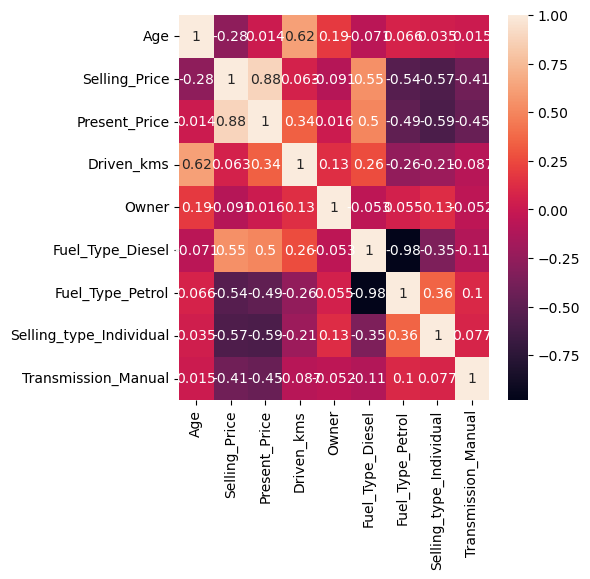

In [29]:
c=df1.corr(method='pearson')
plt.figure(figsize=(5,5))
sns.heatmap(c,annot=True)

In [30]:
df1.reset_index(drop=True,inplace=True)

In [31]:
df1

,Age,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
294,3,9.50,11.60,33988,0,1,0,0,1
295,4,4.00,5.90,60000,0,0,1,0,1
296,10,3.35,11.00,87934,0,0,1,0,1
297,2,11.50,12.50,9000,0,1,0,0,1


In [32]:
X=df1.drop('Selling_Price',axis=1)
Y=df1['Selling_Price']
X

,Age,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,5,5.59,27000,0,0,1,0,1
1,6,9.54,43000,0,1,0,0,1
2,2,9.85,6900,0,0,1,0,1
3,8,4.15,5200,0,0,1,0,1
4,5,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
294,3,11.60,33988,0,1,0,0,1
295,4,5.90,60000,0,0,1,0,1
296,10,11.00,87934,0,0,1,0,1
297,2,12.50,9000,0,1,0,0,1


In [33]:
X1=X

In [34]:
degrees=[1,2]
for degree in degrees:
    vif_data=pd.DataFrame()
    poly_features=PolynomialFeatures(degree=degree,include_bias=False)
    X_poly=poly_features.fit_transform(X)
    X_poly=pd.DataFrame(X_poly,columns=poly_features.get_feature_names(X.columns))
    vif_data['feature']=X_poly.columns
    vif_data['VIF']=[variance_inflation_factor(X_poly.values,i) for i in range(len(X_poly.columns))]
    print(vif_data)
    if(degree==1):
        if ((vif_data['VIF']>10).any()):
            viff=vif_data[vif_data['VIF']>10].feature
            X_poly.drop(viff,axis=1,inplace=True)
    elif(degree==2):
        if((vif_data['VIF']>1.5e+02).any()):
            print(1.5e+02)
            viff=vif_data[vif_data['VIF']>1.5e+02].feature
            X_poly.drop(viff,axis=1,inplace=True)
        
    reg20=LinearRegression()
    X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,random_state=0,test_size=0.3)
    reg20.fit(X_train,Y_train)
    r2=reg20.score(X_train,Y_train)
    r3=reg20.score(X_test,Y_test)
    print('Polynomial degree{0}: r2_score_train={1} and r_score_teset={2}'.format(degree,r2,r3))
    print('***********************************************************************************')
    X=X_poly
    print(X)
    print(1.5e+02)

C:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


                   feature        VIF
0                      Age   8.151314
1            Present_Price   5.149192
2               Driven_kms   5.339247
3                    Owner   1.098734
4         Fuel_Type_Diesel   6.119961
5         Fuel_Type_Petrol  16.876721
6  Selling_type_Individual   2.606926
7      Transmission_Manual   9.592963
Polynomial degree1: r2_score_train=0.8786921853281993 and r_score_teset=0.8873948784538153
***********************************************************************************
      Age  Present_Price  Driven_kms  Owner  Fuel_Type_Diesel  \
0     5.0           5.59     27000.0    0.0               0.0   
1     6.0           9.54     43000.0    0.0               1.0   
2     2.0           9.85      6900.0    0.0               0.0   
3     8.0           4.15      5200.0    0.0               0.0   
4     5.0           6.87     42450.0    0.0               1.0   
..    ...            ...         ...    ...               ...   
294   3.0          11.60    

C:\annaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


                                        feature           VIF
0                                           Age  2.886432e+02
1                                 Present_Price  9.472698e+01
2                                    Driven_kms  2.468505e+02
3                                         Owner  2.502000e+14
4                              Fuel_Type_Diesel  1.286743e+15
5                       Selling_type_Individual  1.801440e+15
6                           Transmission_Manual  1.125900e+15
7                                         Age^2  8.277123e+01
8                             Age Present_Price  9.299328e+01
9                                Age Driven_kms  9.053225e+01
10                                    Age Owner  1.246642e+02
11                         Age Fuel_Type_Diesel  2.757472e+01
12                  Age Selling_type_Individual  3.392612e+01
13                      Age Transmission_Manual  9.829821e+01
14                              Present_Price^2  5.819931e+01
15      

In [35]:
df2=pd.concat([X_poly,Y],axis=1)
df2

,Present_Price,Age^2,Age Present_Price,Age Driven_kms,Age Owner,Age Fuel_Type_Diesel,Age Selling_type_Individual,Age Transmission_Manual,Present_Price^2,Present_Price Driven_kms,...,Driven_kms^2,Driven_kms Fuel_Type_Diesel,Driven_kms Selling_type_Individual,Driven_kms Transmission_Manual,Owner Fuel_Type_Diesel,Owner Selling_type_Individual,Fuel_Type_Diesel Selling_type_Individual,Fuel_Type_Diesel Transmission_Manual,Selling_type_Individual Transmission_Manual,Selling_Price
0,5.59,25.0,27.95,135000.0,0.0,0.0,0.0,5.0,31.2481,150930.0,...,7.290000e+08,0.0,0.0,27000.0,0.0,0.0,0.0,0.0,0.0,3.35
1,9.54,36.0,57.24,258000.0,0.0,6.0,0.0,6.0,91.0116,410220.0,...,1.849000e+09,43000.0,0.0,43000.0,0.0,0.0,0.0,1.0,0.0,4.75
2,9.85,4.0,19.70,13800.0,0.0,0.0,0.0,2.0,97.0225,67965.0,...,4.761000e+07,0.0,0.0,6900.0,0.0,0.0,0.0,0.0,0.0,7.25
3,4.15,64.0,33.20,41600.0,0.0,0.0,0.0,8.0,17.2225,21580.0,...,2.704000e+07,0.0,0.0,5200.0,0.0,0.0,0.0,0.0,0.0,2.85
4,6.87,25.0,34.35,212250.0,0.0,5.0,0.0,5.0,47.1969,291631.5,...,1.802002e+09,42450.0,0.0,42450.0,0.0,0.0,0.0,1.0,0.0,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,11.60,9.0,34.80,101964.0,0.0,3.0,0.0,3.0,134.5600,394260.8,...,1.155184e+09,33988.0,0.0,33988.0,0.0,0.0,0.0,1.0,0.0,9.50
295,5.90,16.0,23.60,240000.0,0.0,0.0,0.0,4.0,34.8100,354000.0,...,3.600000e+09,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,4.00
296,11.00,100.0,110.00,879340.0,0.0,0.0,0.0,10.0,121.0000,967274.0,...,7.732388e+09,0.0,0.0,87934.0,0.0,0.0,0.0,0.0,0.0,3.35
297,12.50,4.0,25.00,18000.0,0.0,2.0,0.0,2.0,156.2500,112500.0,...,8.100000e+07,9000.0,0.0,9000.0,0.0,0.0,0.0,1.0,0.0,11.50


In [37]:
X=df2.drop('Selling_Price',axis=1)
Y=df2['Selling_Price']
X

,Present_Price,Age^2,Age Present_Price,Age Driven_kms,Age Owner,Age Fuel_Type_Diesel,Age Selling_type_Individual,Age Transmission_Manual,Present_Price^2,Present_Price Driven_kms,...,Present_Price Transmission_Manual,Driven_kms^2,Driven_kms Fuel_Type_Diesel,Driven_kms Selling_type_Individual,Driven_kms Transmission_Manual,Owner Fuel_Type_Diesel,Owner Selling_type_Individual,Fuel_Type_Diesel Selling_type_Individual,Fuel_Type_Diesel Transmission_Manual,Selling_type_Individual Transmission_Manual
0,5.59,25.0,27.95,135000.0,0.0,0.0,0.0,5.0,31.2481,150930.0,...,5.59,7.290000e+08,0.0,0.0,27000.0,0.0,0.0,0.0,0.0,0.0
1,9.54,36.0,57.24,258000.0,0.0,6.0,0.0,6.0,91.0116,410220.0,...,9.54,1.849000e+09,43000.0,0.0,43000.0,0.0,0.0,0.0,1.0,0.0
2,9.85,4.0,19.70,13800.0,0.0,0.0,0.0,2.0,97.0225,67965.0,...,9.85,4.761000e+07,0.0,0.0,6900.0,0.0,0.0,0.0,0.0,0.0
3,4.15,64.0,33.20,41600.0,0.0,0.0,0.0,8.0,17.2225,21580.0,...,4.15,2.704000e+07,0.0,0.0,5200.0,0.0,0.0,0.0,0.0,0.0
4,6.87,25.0,34.35,212250.0,0.0,5.0,0.0,5.0,47.1969,291631.5,...,6.87,1.802002e+09,42450.0,0.0,42450.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,11.60,9.0,34.80,101964.0,0.0,3.0,0.0,3.0,134.5600,394260.8,...,11.60,1.155184e+09,33988.0,0.0,33988.0,0.0,0.0,0.0,1.0,0.0
295,5.90,16.0,23.60,240000.0,0.0,0.0,0.0,4.0,34.8100,354000.0,...,5.90,3.600000e+09,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0
296,11.00,100.0,110.00,879340.0,0.0,0.0,0.0,10.0,121.0000,967274.0,...,11.00,7.732388e+09,0.0,0.0,87934.0,0.0,0.0,0.0,0.0,0.0
297,12.50,4.0,25.00,18000.0,0.0,2.0,0.0,2.0,156.2500,112500.0,...,12.50,8.100000e+07,9000.0,0.0,9000.0,0.0,0.0,0.0,1.0,0.0


In [38]:
reg3=LinearRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [39]:
reg3.fit(X_train,Y_train)

LinearRegression()

In [40]:
y_pred=reg3.predict(X_test)

In [41]:
reg3.coef_

array([ 1.08671764e+00,  9.49550523e-03, -5.54141319e-02,  1.24473699e-06,
        8.32336412e-02, -1.76881781e-01, -6.97054472e-02, -7.03068467e-02,
       -9.73389292e-03, -2.48639860e-06,  2.31201120e-01,  1.52782347e-01,
        1.91480240e-02,  1.77098440e-11,  2.38132009e-05,  4.28600699e-07,
       -1.18551540e-05, -3.54840222e-01, -8.88657499e-01, -2.86410718e+00,
       -1.30836032e+00,  2.34118127e-01])

In [42]:
reg3.intercept_

-0.04759584934739447

In [45]:
print('mean_Absolute-Error =',metrics.mean_absolute_error(Y_test,y_pred))

mean_Absolute-Error = 0.5670041002358474


In [46]:
print('mean-squared-error =',metrics.mean_squared_error(Y_test,y_pred))

mean-squared-error = 0.6309551607737524


In [48]:
print('r2score=',metrics.r2_score(Y_test,y_pred))

r2score= 0.9808492989260594


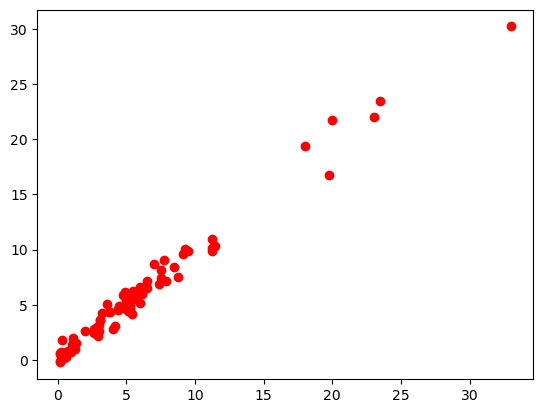

In [51]:
plt.scatter(Y_test,y_pred,color='r')

In [52]:
X=df2.drop('Selling_Price',axis=1)
Y=df2['Selling_Price']

In [53]:
for i in range(2,10):
    cv=KFold(n_splits=i,random_state=0,shuffle=True)
    reg4=LinearRegression()
    scores=cross_val_score(reg4,X,Y,cv=cv)
#print(scores)
    print('Score => k=', i ,':',np.mean(scores))

Score => k= 2 : 0.9679736968644553
Score => k= 3 : 0.964573435536093
Score => k= 4 : 0.967827654602742
Score => k= 5 : 0.9637342393622893
Score => k= 6 : 0.9637607664015935
Score => k= 7 : 0.9626911064262667
Score => k= 8 : 0.9639698597744532
Score => k= 9 : 0.9628452345847269


In [55]:
X=df2.drop('Selling_Price',axis=1)
Y=df2['Selling_Price']
X

,Present_Price,Age^2,Age Present_Price,Age Driven_kms,Age Owner,Age Fuel_Type_Diesel,Age Selling_type_Individual,Age Transmission_Manual,Present_Price^2,Present_Price Driven_kms,...,Present_Price Transmission_Manual,Driven_kms^2,Driven_kms Fuel_Type_Diesel,Driven_kms Selling_type_Individual,Driven_kms Transmission_Manual,Owner Fuel_Type_Diesel,Owner Selling_type_Individual,Fuel_Type_Diesel Selling_type_Individual,Fuel_Type_Diesel Transmission_Manual,Selling_type_Individual Transmission_Manual
0,5.59,25.0,27.95,135000.0,0.0,0.0,0.0,5.0,31.2481,150930.0,...,5.59,7.290000e+08,0.0,0.0,27000.0,0.0,0.0,0.0,0.0,0.0
1,9.54,36.0,57.24,258000.0,0.0,6.0,0.0,6.0,91.0116,410220.0,...,9.54,1.849000e+09,43000.0,0.0,43000.0,0.0,0.0,0.0,1.0,0.0
2,9.85,4.0,19.70,13800.0,0.0,0.0,0.0,2.0,97.0225,67965.0,...,9.85,4.761000e+07,0.0,0.0,6900.0,0.0,0.0,0.0,0.0,0.0
3,4.15,64.0,33.20,41600.0,0.0,0.0,0.0,8.0,17.2225,21580.0,...,4.15,2.704000e+07,0.0,0.0,5200.0,0.0,0.0,0.0,0.0,0.0
4,6.87,25.0,34.35,212250.0,0.0,5.0,0.0,5.0,47.1969,291631.5,...,6.87,1.802002e+09,42450.0,0.0,42450.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,11.60,9.0,34.80,101964.0,0.0,3.0,0.0,3.0,134.5600,394260.8,...,11.60,1.155184e+09,33988.0,0.0,33988.0,0.0,0.0,0.0,1.0,0.0
295,5.90,16.0,23.60,240000.0,0.0,0.0,0.0,4.0,34.8100,354000.0,...,5.90,3.600000e+09,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0
296,11.00,100.0,110.00,879340.0,0.0,0.0,0.0,10.0,121.0000,967274.0,...,11.00,7.732388e+09,0.0,0.0,87934.0,0.0,0.0,0.0,0.0,0.0
297,12.50,4.0,25.00,18000.0,0.0,2.0,0.0,2.0,156.2500,112500.0,...,12.50,8.100000e+07,9000.0,0.0,9000.0,0.0,0.0,0.0,1.0,0.0


In [56]:
reg3=LinearRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [57]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [58]:
reg3.fit(x_train_scaled,Y_train)

LinearRegression()

In [59]:
y_pred=reg3.predict(x_test_scaled)
reg3.coef_

array([ 7.39871017,  0.41631456, -2.85571301,  0.44317196,  0.24825268,
       -0.40854416, -0.21964998, -0.22060628, -1.79858342, -1.47315755,
        1.51706301,  0.42339032,  0.09770269,  0.0854912 ,  0.60376892,
        0.01063087, -0.33227496, -0.02448602, -0.21962463, -0.19763991,
       -0.47708349,  0.1092623 ])

In [60]:
reg3.intercept_

4.302488038277512

In [61]:
print('r2score =',metrics.r2_score(Y_test,y_pred))

r2score = 0.980849298842374
